<a href="https://colab.research.google.com/github/Domver345/UM-Data-Science-Projects/blob/main/Cybersecurity_Suspicious_Web_Threat_Interactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Overview
**Objective:** To detect and analyze patterns in web interactions for identifying
suspicious or potentially harmful activities.

##1. Data Import and Basic Overview

In [ ]:
import pandas as pd
# Load dataset
df = pd.read_csv('/content/CloudWatch_Traffic_Web_Attack.csv')
# View basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


##2. Data Preprocessing
Handle missing values, outliers, and data inconsistencies.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
# Fill or drop missing values as needed
df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)
df.dropna(subset=['src_ip', 'dst_ip'], inplace=True)
# Convert columns to appropriate datatypes
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

<ipython-input-2-a9f53e258e7c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)


##3. Exploratory Data Analysis (EDA)
Analyze Traffic Patterns Based on `bytes_in` and `bytes_out`

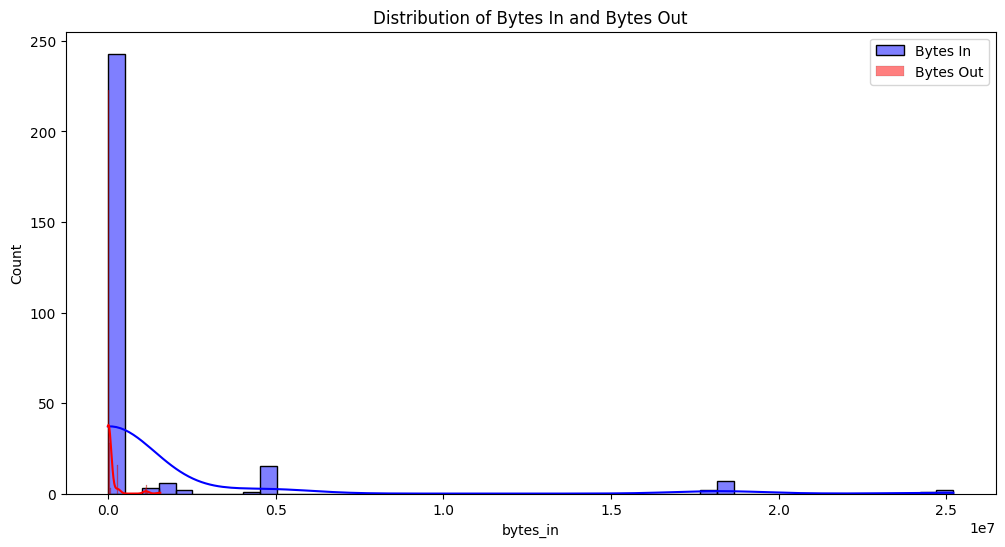

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of bytes in and bytes out
plt.figure(figsize=(12, 6))
sns.histplot(df['bytes_in'], bins=50, color='blue', kde=True,
label='Bytes In')
sns.histplot(df['bytes_out'], bins=50, color='red', kde=True,
label='Bytes Out')
plt.legend()
plt.title('Distribution of Bytes In and Bytes Out')
plt.show()

###Count of Protocols Used

<ipython-input-4-90ad2b75fe8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol', data=df, palette='viridis')


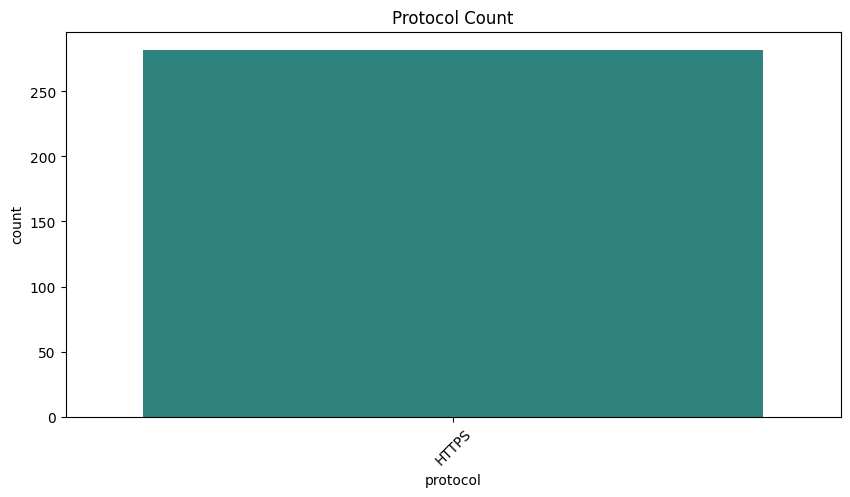

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='protocol', data=df, palette='viridis')
plt.title('Protocol Count')
plt.xticks(rotation=45)
plt.show()

##4. Feature Engineering
Extract useful features, like duration and average packet size, to aid in analysis.

In [ ]:
# Duration of the session in seconds
df['session_duration'] = (df['end_time'])
# Duration of the session in seconds
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

# Average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration']

##5. Data Visualization
Country-based Interaction Analysis

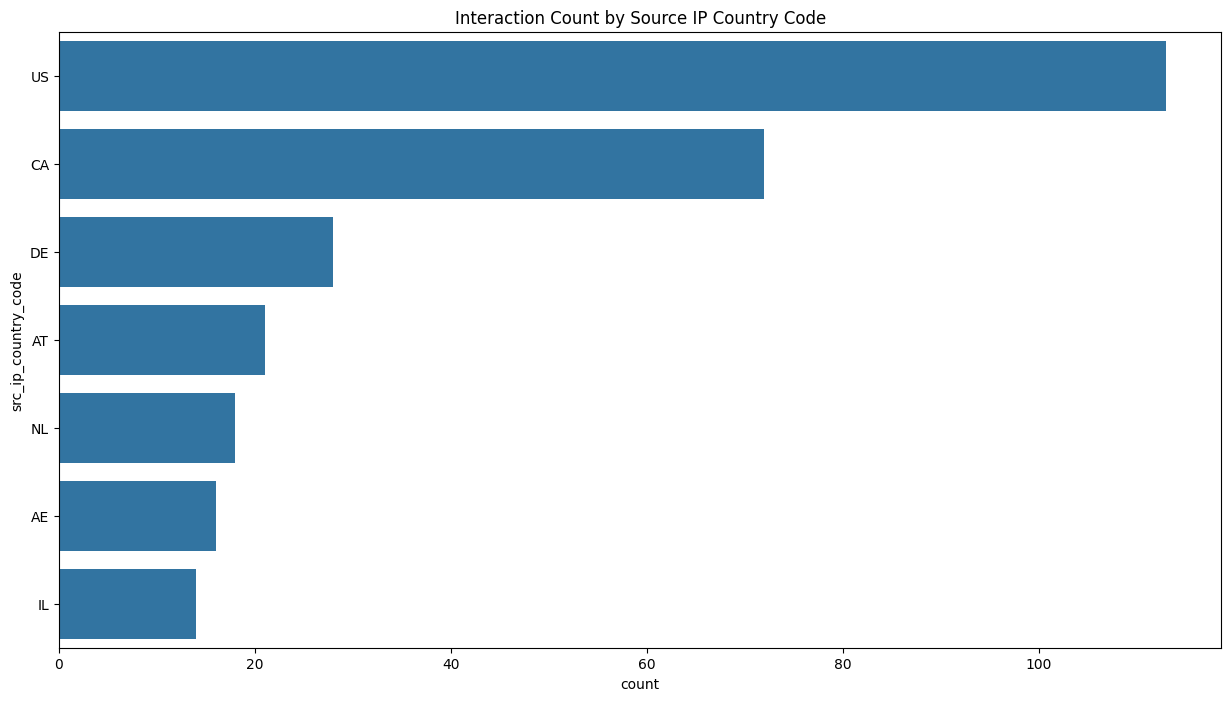

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(y='src_ip_country_code', data=df,
order=df['src_ip_country_code'].value_counts().index)
plt.title('Interaction Count by Source IP Country Code')
plt.show()

###Suspicious Activities Based on Ports

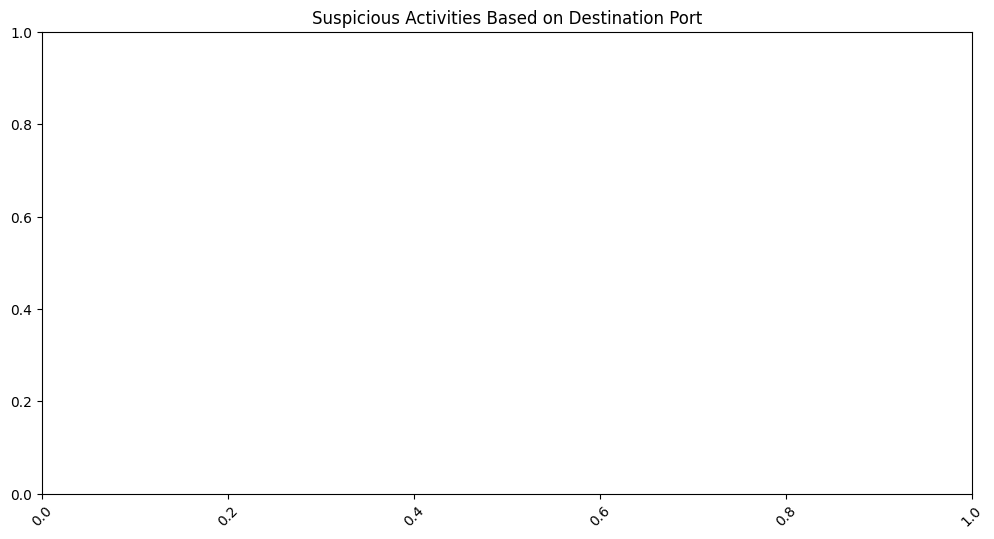

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dst_port', data=df[df['detection_types'] ==
'Suspicious'], palette='coolwarm')
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

##6. Modeling: Anomaly Detection
This step uses Isolation Forest, a common technique for detecting anomalies.

In [ ]:
from sklearn.ensemble import IsolationForest
# Selecting features for anomaly detection
features = df[['bytes_in', 'bytes_out', 'session_duration',
'avg_packet_size']]
# Initialize the model
model = IsolationForest(contamination=0.05, random_state=42)
# Fit and predict anomalies
df['anomaly'] = model.fit_predict(features)
df['anomaly'] = df['anomaly'].apply(lambda x: 'Suspicious' if x
== -1 else 'Normal')

##7. Evaluation
Evaluate the anomaly detection model by checking its accuracy in identifying
suspicious activities.

In [ ]:
# Check the proportion of anomalies detected
print(df['anomaly'].value_counts())
# Display anomaly samples
suspicious_activities = df[df['anomaly'] == 'Suspicious']
print(suspicious_activities.head())

anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64
     bytes_in  bytes_out             creation_time                  end_time  \
36    4190330     283456 2024-04-25 23:30:00+00:00 2024-04-25 23:40:00+00:00   
87    1215594      64362 2024-04-26 00:30:00+00:00 2024-04-26 00:40:00+00:00   
116   4827283     306181 2024-04-26 01:00:00+00:00 2024-04-26 01:10:00+00:00   
132   1889834      34306 2024-04-26 01:20:00+00:00 2024-04-26 01:30:00+00:00   
153   4869181     301752 2024-04-26 01:40:00+00:00 2024-04-26 01:50:00+00:00   

             src_ip src_ip_country_code protocol  response.code  dst_port  \
36    155.91.45.242                  US    HTTPS            200       443   
87   165.225.240.79                  NL    HTTPS            200       443   
116   155.91.45.242                  US    HTTPS            200       443   
132  165.225.240.79                  NL    HTTPS            200       443   
153   155.91.45.242                  US    HTTPS            200 

##8. Visualization of Anomalies

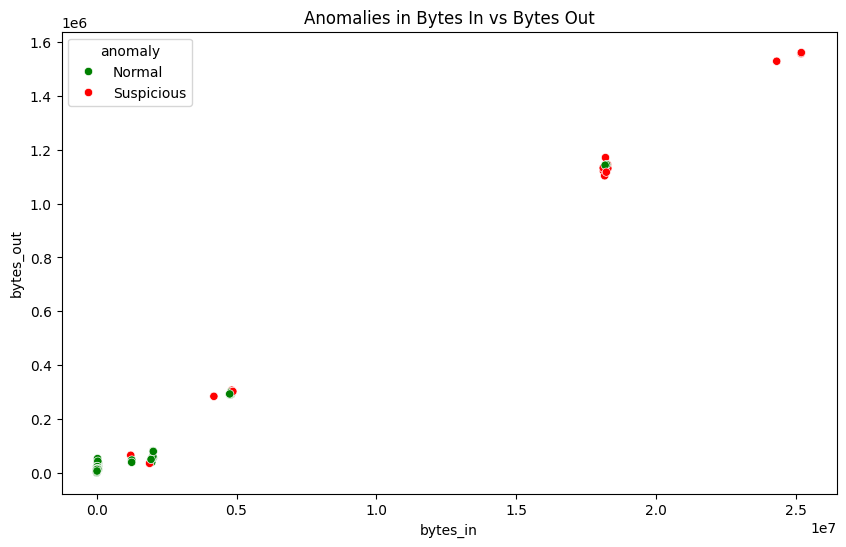

In [ ]:
# Visualize bytes_in vs bytes_out with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly',
data=df, palette=['green', 'red'])
plt.title('Anomalies in Bytes In vs Bytes Out')
plt.show()

##9. Report Findings
Based on the model output and visualizations, interpret the most frequent anomaly
patterns, source IPs, and ports related to suspicious activities.

In [ ]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the data into a DataFrame
data =pd.read_csv("/content/CloudWatch_Traffic_Web_Attack.csv")
# Display the first few rows of the DataFrame to understand its structure
data.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


#Data Preparation

## 1. Data Cleaning
The dataset contains 282 entries across 16 columns. There are no null values in any of the columns, which is good news for data integrity. However, let's proceed with the following data cleaning tasks:
1. **Removing Duplicate Rows**: Even though all entries appear non-null, there may still be duplicate entries that should be removed to prevent skewing our analysis.
2. **Correcting Data Types**: Some columns such as `creation_time`, `end_time`, and `time` should ideally be in datetime format for any time series analysis or operations that involve time intervals.
3. **Standardize Text Data**: Ensuring consistency in how text data is formatted can be important, particularly if you're going to perform text-based operations or integrations.
The data has been cleaned with the following steps implemented:
1. **Duplicate Rows**: No duplicate rows were found, so the dataset remains with 282 entries.
2. **Data Types**: The `creation_time`, `end_time`, and `time` columns have been successfully converted to datetime format, which is more appropriate for any operations involving time.
3. **Text Data Standardization**: The `src_ip_country_code` has been standardized to uppercase to ensure consistency across this field.

###Handling Missing Data

In [ ]:
# Remove duplicate rows
df_unique = data.drop_duplicates()
# Convert time-related columns to datetime format
df_unique['creation_time'] = pd.to_datetime(df_unique['creation_time'])
df_unique['end_time'] = pd.to_datetime(df_unique['end_time'])
df_unique['time'] = pd.to_datetime(df_unique['time'])
# Standardize text data (example: convert to lower case)
df_unique['src_ip_country_code'] = df_unique['src_ip_country_code'].str.upper() # Ensuring country codes are all upper case
# Display changes and current state of the DataFrame
print("Unique Datasets Information:")
df_unique.info()

Unique Datasets Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object            

In [ ]:
print("Top 5 Unique Datasets Information:")
df_unique.head()

Top 5 Unique Datasets Information:


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule


# Data Transformation

When it comes to preparing our dataset for machine learning models, one of the most important steps is data transformation. This phase helps to standardize or normalize the data, which in turn makes it simpler for the models to learn and generate correct predictions. Listed below are some of the more typical methods of data transformation that you could use:

1. Normalization and Scaling

Normalization or scaling ensures that numeric features contribute equally to model training. Common methods include:
**● Min-Max Scaling**: Transforms features to a fixed range, usually 0 to 1.
**● Standardization (Z-score Scaling)**: Centers the data by removing the mean and scales it by the standard deviation to achieve a variance of 1 and mean of 0.

2. Encoding Categorical Data

Machine learning models generally require all input and output variables to be numeric. This means that categorical data must be converted into a numerical format.
**● One-Hot Encoding**: Creates a binary column for each category and returns a matrix with 1s and 0s.
**● Label Encoding**: Converts each value in a column to a number.

3. Feature Engineering

Feature engineering is the process of using domain knowledge to select, modify, or create new features that increase the predictive power of the learning algorithm.
**● Polynomial Features**: Derive new feature interactions.
**● Binning**: Convert numerical values into categorical bins.

Applying These Transformations

Now will try to apply some of these transformations to our dataset:
1. Scale the `bytes_in` and `bytes_out` columns using Standardization.
2. One-hot encode the `src_ip_country_code` column since it is a categorical feature.
3. Feature engineering example: Create a new feature that measures the duration of the connection based on `creation_time` and `end_time`.

Now we will start with these transformations.
1. Scaling: The `bytes_in`, `bytes_out`, and the newly created `duration_seconds` (which captures the duration of the connection) columns have been standardized using z-score scaling. This means their mean is now 0 and standard deviation is 1, which helps in normalizing the data for better performance of many machine learning algorithms.
2. One-Hot Encoding: The `src_ip_country_code` column has been one-hot encoded. This has transformed each country code into its own feature, allowing categorical data to be used effectively in machine learning models.
3. Feature Engineering: A new feature `duration_seconds` was added to measure the duration of each web session.

In [ ]:
# Feature engineering: Calculate duration of connection
df_unique['duration_seconds'] = (df_unique['end_time'] - df_unique['creation_time']).dt.total_seconds()
# Preparing column transformations
# StandardScaler for numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[['bytes_in', 'bytes_out', 'duration_seconds']])

In [ ]:
# OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])
# Combining transformed features back into the DataFrame
scaled_columns = ['scaled_bytes_in', 'scaled_bytes_out','scaled_duration_seconds']
encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])

In [ ]:
# Convert numpy arrays back to DataFrame
scaled_df = pd.DataFrame(scaled_features,
columns=scaled_columns, index=df_unique.index)
encoded_df = pd.DataFrame(encoded_features,
columns=encoded_columns, index=df_unique.index)
# Concatenate all the data back together
transformed_df = pd.concat([df_unique, scaled_df, encoded_df],
axis=1)
# Displaying the transformed data
transformed_df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,scaled_bytes_in,scaled_bytes_out,scaled_duration_seconds,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,-0.288219,-0.281223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,-0.282108,-0.260804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,-0.282689,-0.279344,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,-0.282197,-0.276161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,-0.287996,-0.277678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Exploratory Data Analysis (EDA)
A significant stage in the process of summarizing, describing, and comprehending
the underlying patterns in the data is the performing of statistical analysis. Examining
several aspects such as distributions, central trends, variability, and correlations
between characteristics is included in this. On your converted dataset, let's carry out
a number of statistical analysis, including the following:
1. Descriptive Statistics : This includes mean, median, mode, min, max, range,
quartiles, and standard deviations.
2. Correlation Analysis : To investigate the relationships between numerical
features and how they relate to each other.
3. Distribution Analysis : Examine the distribution of key features using
histograms and box plots to identify the spread and presence of outliers.
Descriptive Statistics
The descriptive statistics provide a summary of the key statistical characteristics of
the numerical features:
● bytes_in and bytes_out : These columns have a high standard deviation
relative to their mean, indicating significant variability. This could be reflective of
different types of web sessions or activities.
● response.code and dst_port : These fields are constants in the dataset
(200 and 443, respectively), indicating all records are using HTTPS protocol on
standard port 443 and receiving a standard HTTP 200 OK response.
● duration_seconds : It's also constant (600 seconds), which suggests that
each session or observation is recorded over a fixed interval.
● Scaled Features : The scaled versions of bytes_in, bytes_out, and
duration_seconds have a mean of approximately 0 and a standard
deviation of 1, as expected after standardization.

#Exploratory Data Analysis (EDA)
A significant stage in the process of summarizing, describing, and comprehending
the underlying patterns in the data is the performing of statistical analysis. Examining
several aspects such as distributions, central trends, variability, and correlations
between characteristics is included in this. On your converted dataset, let's carry out
a number of statistical analysis, including the following:
1. **Descriptive Statistics** : This includes mean, median, mode, min, max, range,
quartiles, and standard deviations.
2. **Correlation Analysis** : To investigate the relationships between numerical
features and how they relate to each other.
3. **Distribution Analysis** : Examine the distribution of key features using
histograms and box plots to identify the spread and presence of outliers.
**Descriptive Statistics**
The descriptive statistics provide a summary of the key statistical characteristics of
the numerical features:
● `bytes_in` and `bytes_out` : These columns have a high standard deviation
relative to their mean, indicating significant variability. This could be reflective of
different types of web sessions or activities.
● `response.code` and `dst_port` : These fields are constants in the dataset
(200 and 443, respectively), indicating all records are using HTTPS protocol on
standard port 443 and receiving a standard HTTP 200 OK response.
● `duration_seconds` : It's also constant (600 seconds), which suggests that
each session or observation is recorded over a fixed interval.
● `Scaled Features` : The scaled versions of `bytes_in`, `bytes_out`, and
`duration_seconds` have a mean of approximately 0 and a standard
deviation of 1, as expected after standardization.

In [ ]:
# Compute correlation matrix for numeric columns only
numeric_df = transformed_df.select_dtypes(include=['float64','int64'])
correlation_matrix_numeric = numeric_df.corr()
# Display the correlation matrix
correlation_matrix_numeric

,bytes_in,bytes_out,response.code,dst_port,duration_seconds,scaled_bytes_in,scaled_bytes_out,scaled_duration_seconds,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
bytes_in,1.000000,0.997705,NaN,NaN,NaN,1.000000,0.997705,NaN,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015
bytes_out,0.997705,1.000000,NaN,NaN,NaN,0.997705,1.000000,NaN,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683
response.code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scaled_bytes_in,1.000000,0.997705,NaN,NaN,NaN,1.000000,0.997705,NaN,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015
scaled_bytes_out,0.997705,1.000000,NaN,NaN,NaN,0.997705,1.000000,NaN,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683
scaled_duration_seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src_ip_country_code_AE,-0.070559,-0.072452,NaN,NaN,NaN,-0.070559,-0.072452,NaN,1.000000,-0.069568,-0.143607,-0.081429,-0.056055,-0.064040,-0.200546
src_ip_country_code_AT,-0.081670,-0.081777,NaN,NaN,NaN,-0.081670,-0.081777,NaN,-0.069568,1.000000,-0.166091,-0.094178,-0.064831,-0.074067,-0.231945


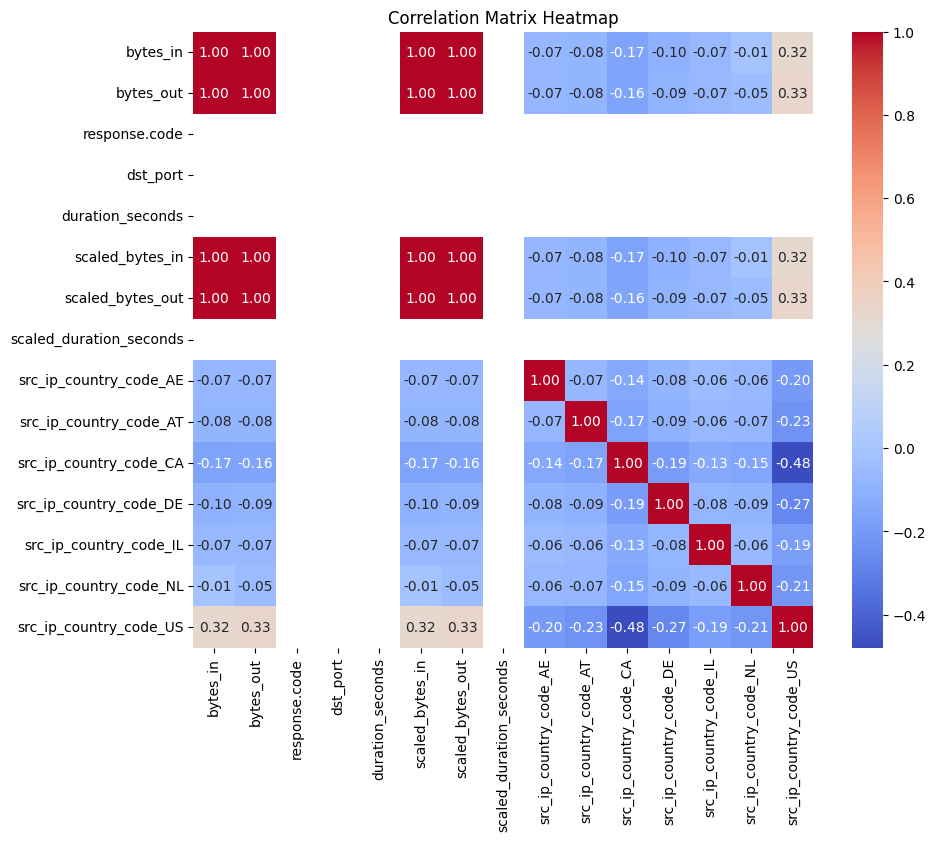

In [ ]:
# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

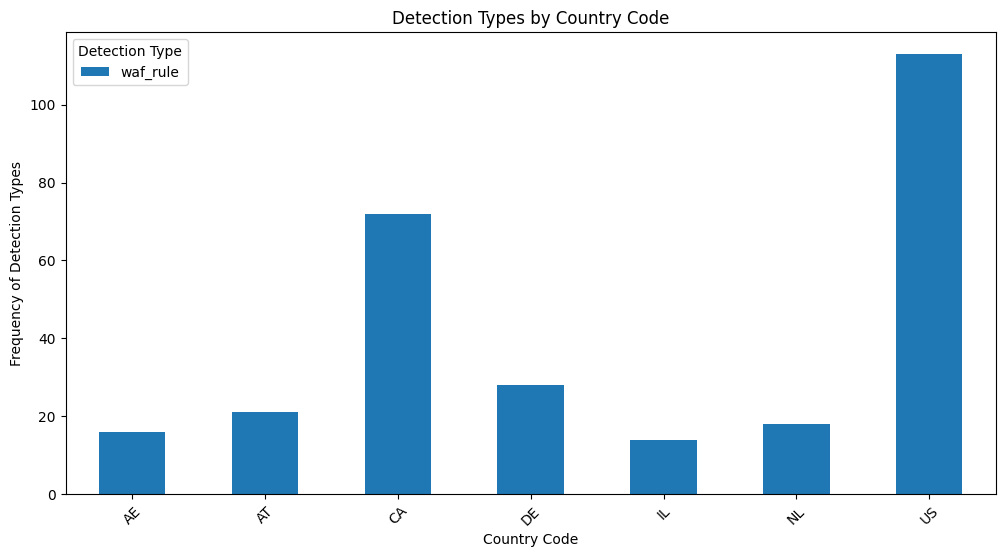

In [ ]:
# Stacked Bar Chart for Detection Types by Country
# Preparing data for stacked bar chart
detection_types_by_country =pd.crosstab(transformed_df['src_ip_country_code'],
transformed_df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True,figsize=(12, 6))
plt.title('Detection Types by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

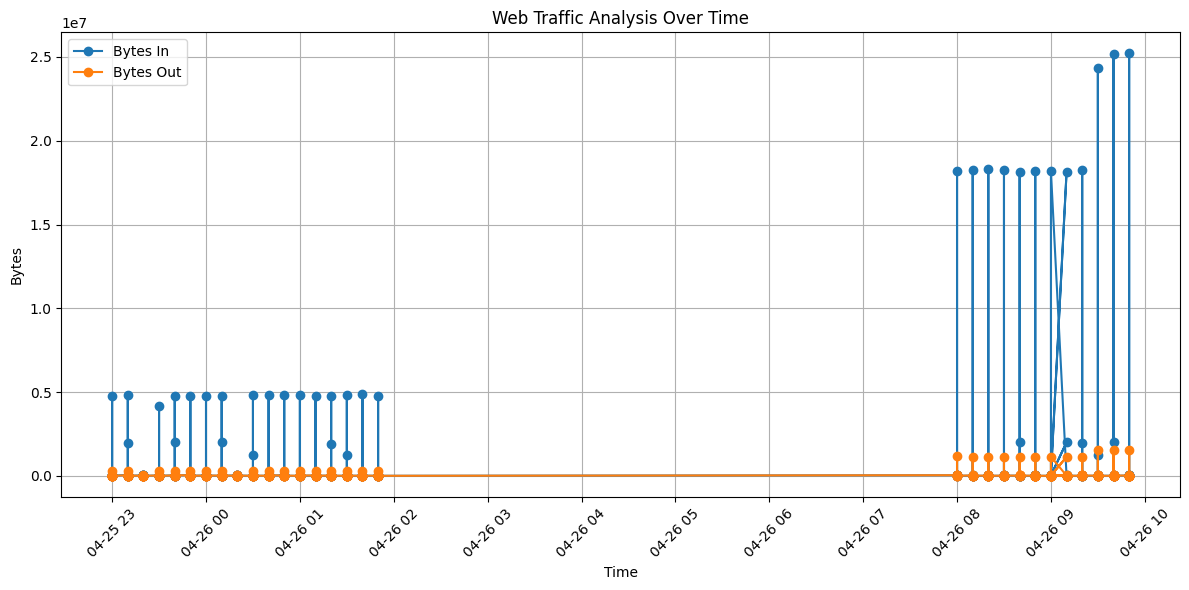

In [ ]:
# Convert 'creation_time' to datetime format
data['creation_time'] = pd.to_datetime(data['creation_time'])
# Set 'creation_time' as the index
data.set_index('creation_time', inplace=True)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['bytes_in'], label='Bytes In',marker='o')
plt.plot(data.index, data['bytes_out'], label='Bytes Out',marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

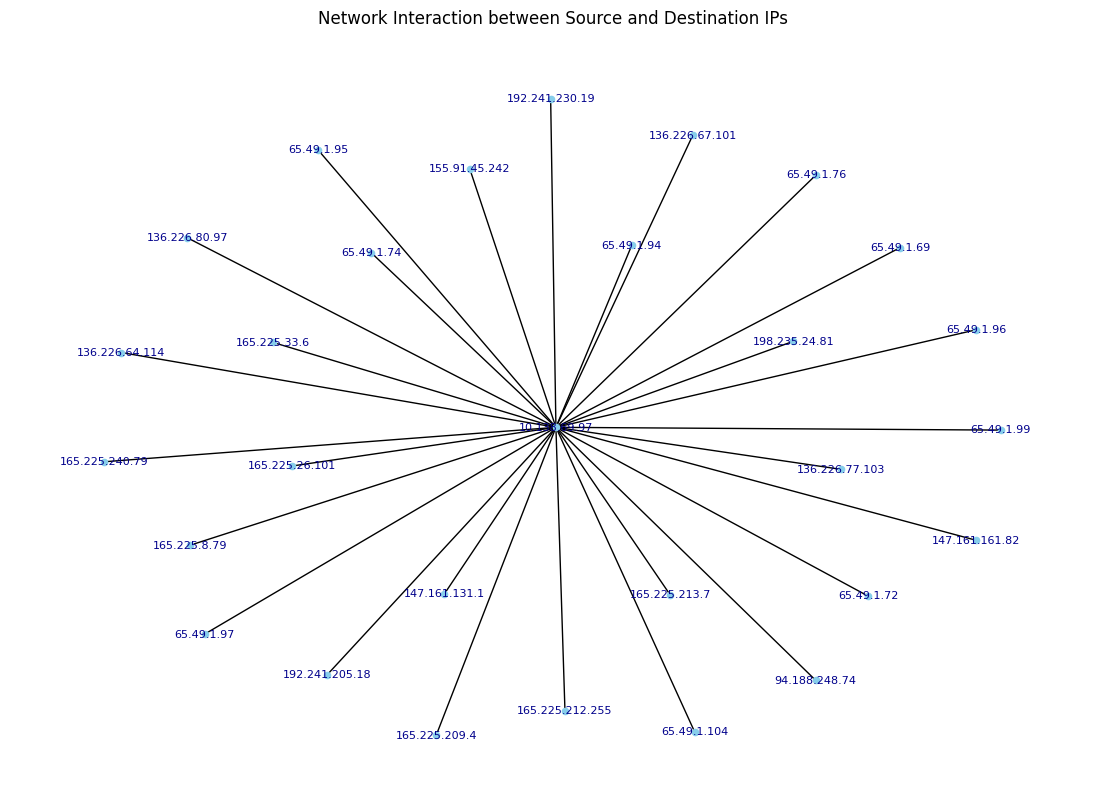

In [ ]:
# Create a graph
G = nx.Graph()
# Add edges from source IP to destination IP
for idx, row in data.iterrows():
  G.add_edge(row['src_ip'], row['dst_ip'])
# Draw the network graph
plt.figure(figsize=(14, 10))
nx.draw_networkx(G, with_labels=True, node_size=20,
font_size=8, node_color='skyblue', font_color='darkblue')
plt.title('Network Interaction between Source and Destination IPs')
plt.axis('off') # Turn off the axis
# Show the plot
plt.show()

###RandomForestClassifier

In [ ]:
# First, encode this column into binary labels
transformed_df['is_suspicious'] =(transformed_df['detection_types'] == 'waf_rule').astype(int)
# Features and Labels
X = transformed_df[['bytes_in', 'bytes_out','scaled_duration_seconds']] # Numeric features
y = transformed_df['is_suspicious'] # Binary labels

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
# Train the model
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [ ]:
print("Model Accuracy: ",accuracy)

Model Accuracy:  1.0


In [ ]:
print("Classification Report: ",classification)

Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



###Neural Network

In [ ]:
data['is_suspicious'] = (data['detection_types'] == 'waf_rule').astype(int)
# Features and labels
X = data[['bytes_in', 'bytes_out']].values # Using only numeric features
y = data['is_suspicious'].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Neural network model
model = Sequential([
  Dense(8, activation='relu',
  input_shape=(X_train_scaled.shape[1],)),
  Dense(16, activation='relu'),
  Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10,batch_size=8, verbose=1)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3980 - loss: 0.6821
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.5668
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.4716
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3669 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2862 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2124 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1552
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1127
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0834 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0433 
Test Accuracy: 100.00%


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8150 - loss: 0.6543 - val_accuracy: 1.0000 - val_loss: 0.5537
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.5570 - val_accuracy: 1.0000 - val_loss: 0.4729
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.4758 - val_accuracy: 1.0000 - val_loss: 0.3932
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.3903 - val_accuracy: 1.0000 - val_loss: 0.3108
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.3138 - val_accuracy: 1.0000 - val_loss: 0.2287
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.2334 - val_accuracy: 1.0000 - val_loss: 0.1539
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.1641 - val_accuracy: 1.0000 - val_loss: 0.0956
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0954 - val_accuracy: 1.0000 - val_loss: 0.0565


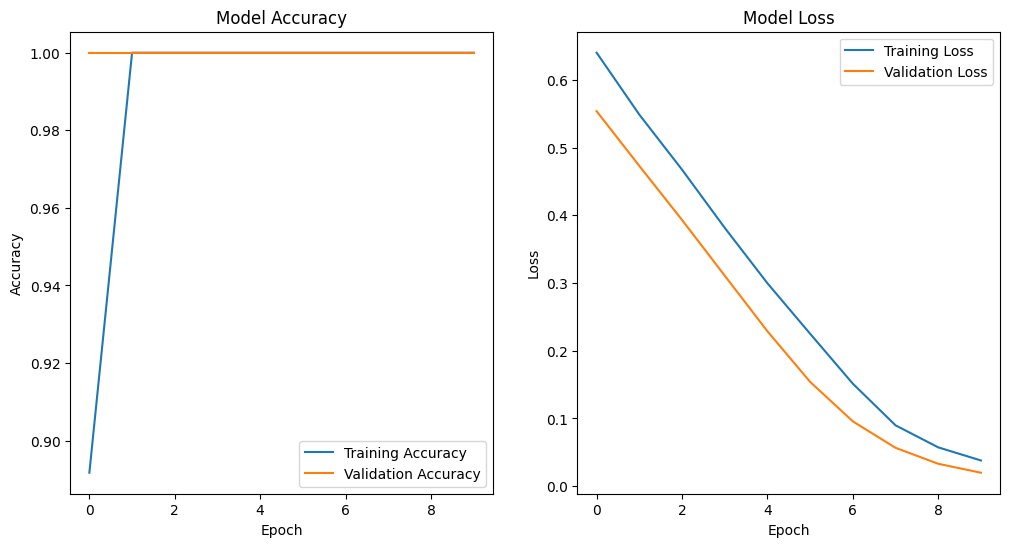

In [ ]:
# Neural network model
model = Sequential([
  Dense(128, activation='relu',
  input_shape=(X_train_scaled.shape[1],)),
  Dropout(0.5),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5235 - loss: 0.6738 - val_accuracy: 1.0000 - val_loss: 0.6104
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9611 - loss: 0.6383 - val_accuracy: 1.0000 - val_loss: 0.5673
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.5998 - val_accuracy: 1.0000 - val_loss: 0.5269
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.5475 - val_accuracy: 1.0000 - val_loss: 0.4888
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.5148 - val_accuracy: 1.0000 - val_loss: 0.4505
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.4737 - val_accuracy: 1.0000 - val_loss: 0.4092
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.4303 - val_accuracy: 1.0000 - val_loss: 0.3648
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.3805 - val_accuracy: 1.0000 - val_loss: 0.3166


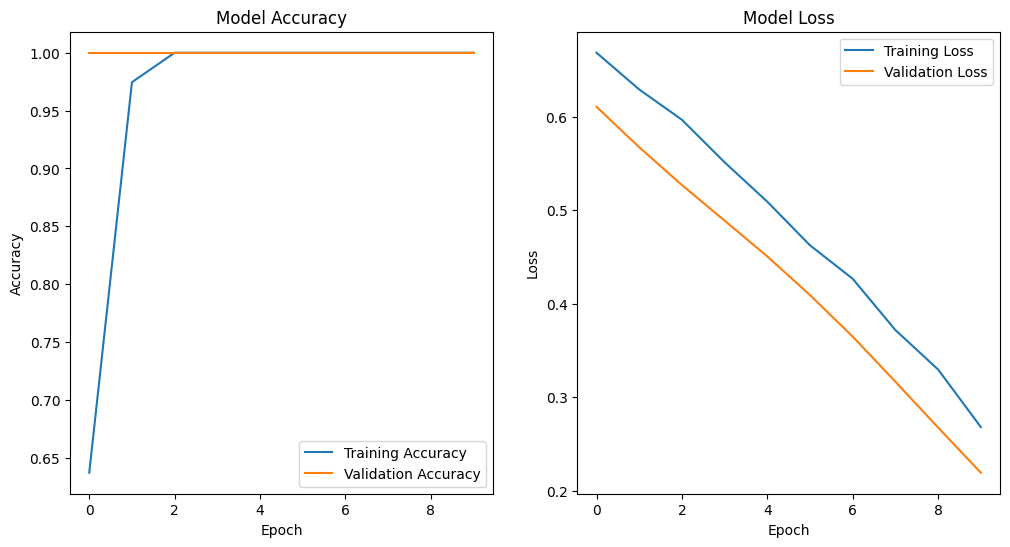

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1,X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1,X_test.shape[-1])).reshape(X_test.shape)
# Adjusting the network to accommodate the input size
model = Sequential([
  Conv1D(32, kernel_size=1, activation='relu',
  input_shape=(X_train_scaled.shape[1], 1)),
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10,batch_size=32, verbose=1, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()